In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_csv('managers.csv', index_col=0, parse_dates=True)
N = 13 # number of managers
K = 6 # number of managers to pick

output = pd.DataFrame(data = [], columns=['Manager 1', 'Manager 2',  'Manager 3', 'Manager 4', 'Manager 5', 'Manager 6', '10Y Ann Ret', '10Y Ann Excess Ret', '10Y Vol', '10Y Excess Vol', '10Y Sharpe', '10Y IR'])
output.loc[0] = [np.nan] * len(output.columns)

combinations = itertools.combinations(data.columns[:-2], K)

In [3]:
for i, combo in enumerate(combinations):
    weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
    data['Total Portfolio Return'] = np.dot(data[list(combo)], weights)
    data['Excess Return'] = data['Total Portfolio Return'] - data['Market']
    returns = np.prod(1 + data['Total Portfolio Return']) ** (1/10) - 1
    market_ret = np.prod(1 + data['Market']) ** (1/10) - 1
    risk_free_returns = np.prod(1 + data['Rf']) ** (1/10) - 1
    excess_ret = returns - market_ret
    vol = data['Total Portfolio Return'].std() * np.sqrt(119/120) * np.sqrt(12)
    excess_vol = data['Excess Return'].std() * np.sqrt(119/120) * np.sqrt(12)
    sharpe = (returns - risk_free_returns) / vol
    ir = excess_ret / excess_vol
    
    # append results to output dataframe
    output.loc[i] = list(combo) + [returns, excess_ret, vol, excess_vol, sharpe, ir]

output

,Manager 1,Manager 2,Manager 3,Manager 4,Manager 5,Manager 6,10Y Ann Ret,10Y Ann Excess Ret,10Y Vol,10Y Excess Vol,10Y Sharpe,10Y IR
0,EN-Invesco,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,EN-SSGA 1.5,0.095909,0.007373,0.144261,0.009238,0.515676,0.798143
1,EN-Invesco,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,HO-Invesco,0.095965,0.007429,0.144627,0.012468,0.514759,0.595859
2,EN-Invesco,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,HO-DFA,0.094945,0.00641,0.145721,0.010556,0.503897,0.607192
3,EN-Invesco,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,HO-Lazard,0.097084,0.008548,0.144046,0.009663,0.524599,0.884557
4,EN-Invesco,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,HO-PanAgora,0.096322,0.007787,0.144516,0.00998,0.517628,0.780258
...,...,...,...,...,...,...,...,...,...,...,...,...
1711,HO-Invesco,HO-DFA,HO-Lazard,HO-PanAgora,HO-AQR,HO-NTAM,0.095455,0.006919,0.144747,0.016919,0.510809,0.408963
1712,HO-Invesco,HO-DFA,HO-Lazard,HO-Acadian,HO-AQR,HO-NTAM,0.096221,0.007686,0.144258,0.01822,0.517853,0.421817
1713,HO-Invesco,HO-DFA,HO-PanAgora,HO-Acadian,HO-AQR,HO-NTAM,0.095451,0.006915,0.144784,0.018834,0.510651,0.367172
1714,HO-Invesco,HO-Lazard,HO-PanAgora,HO-Acadian,HO-AQR,HO-NTAM,0.097593,0.009057,0.143075,0.018172,0.53172,0.498434


In [4]:
output.to_csv('output.csv')

In [28]:
output_sort = output.copy()
output_sort = output_sort.sort_values('10Y IR', ascending=False).iloc[:10]
output_sort

,Manager 1,Manager 2,Manager 3,Manager 4,Manager 5,Manager 6,10Y Ann Ret,10Y Ann Excess Ret,10Y Vol,10Y Excess Vol,10Y Sharpe,10Y IR
887,EN-Robeco,EN-BlackRock,EN-SSGA 1.0,EN-SSGA 1.5,HO-Lazard,HO-PanAgora,0.097245,0.008709,0.14374,0.008691,0.526841,1.002158
38,EN-Invesco,EN-Robeco,EN-BlackRock,EN-SSGA 1.0,EN-SSGA 1.5,HO-Lazard,0.096982,0.008446,0.143732,0.008865,0.52504,0.952713
794,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,EN-SSGA 1.5,HO-Lazard,0.096932,0.008396,0.143806,0.008838,0.52442,0.949955
75,EN-Invesco,EN-Robeco,EN-BlackRock,EN-SSGA 1.5,HO-Lazard,HO-PanAgora,0.097724,0.009188,0.143797,0.009673,0.529958,0.949879
959,EN-Robeco,EN-BlackRock,EN-SSGA 1.5,HO-Lazard,HO-PanAgora,HO-NTAM,0.098576,0.01004,0.143634,0.010599,0.536492,0.947276
924,EN-Robeco,EN-BlackRock,EN-SSGA 1.0,HO-Lazard,HO-PanAgora,HO-NTAM,0.098251,0.009715,0.143803,0.010269,0.533603,0.9461
831,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.5,HO-Lazard,HO-PanAgora,0.097673,0.009137,0.143875,0.009707,0.529318,0.941313
54,EN-Invesco,EN-Robeco,EN-BlackRock,EN-SSGA 1.0,HO-Lazard,HO-PanAgora,0.097398,0.008862,0.143974,0.009418,0.52705,0.941003
890,EN-Robeco,EN-BlackRock,EN-SSGA 1.0,EN-SSGA 1.5,HO-Lazard,HO-NTAM,0.097833,0.009297,0.143571,0.009907,0.531555,0.938436
810,EN-Robeco,EN-BlackRock,EN-Acadian,EN-SSGA 1.0,HO-Lazard,HO-PanAgora,0.097346,0.008811,0.144056,0.009532,0.526388,0.924328


In [30]:
df2 = output.copy()
string = 'EN-BlackRock'

# filter out rows that don't contain 'HO-DFA' in any of the Manager columns
df_filtered = df2[df2['Manager 1'].str.contains(string) |
                 df2['Manager 2'].str.contains(string) |
                 df2['Manager 3'].str.contains(string) |
                 df2['Manager 4'].str.contains(string) |
                 df2['Manager 5'].str.contains(string) |
                 df2['Manager 6'].str.contains(string)]

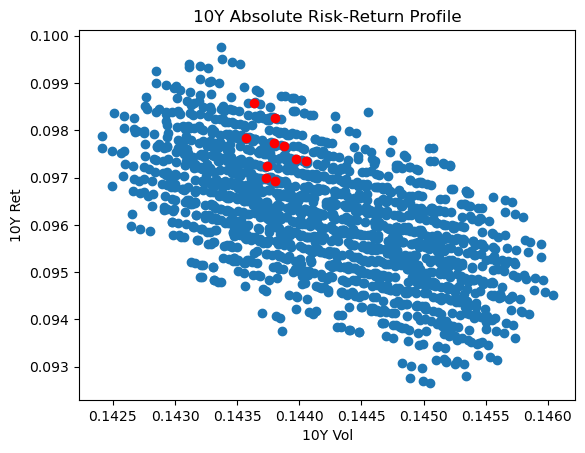

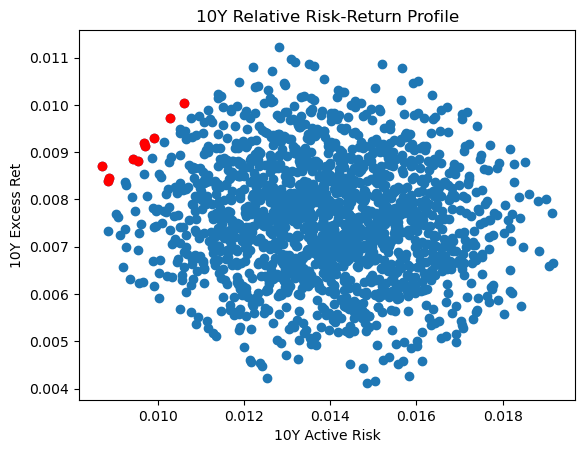

In [33]:
# Create the Sharpe Ratio plot
plt.scatter(output['10Y Vol'], output['10Y Ann Ret'])
plt.xlabel('10Y Vol')
plt.ylabel('10Y Ret')
plt.title('10Y Absolute Risk-Return Profile')

# Highlight
plt.scatter(output_sort['10Y Vol'], output_sort['10Y Ann Ret'], color='red', marker='o')
plt.savefig('charts/top_10_absolute.png')
plt.show()

# Create the Information Ratio plot
plt.scatter(output['10Y Excess Vol'], output['10Y Ann Excess Ret'])
plt.xlabel('10Y Active Risk')
plt.ylabel('10Y Excess Ret')
plt.title('10Y Relative Risk-Return Profile')

# Highlight
plt.scatter(output_sort['10Y Excess Vol'], output_sort['10Y Ann Excess Ret'], color='red', marker='o')
plt.savefig('charts/top_10_relative.png')
plt.show()

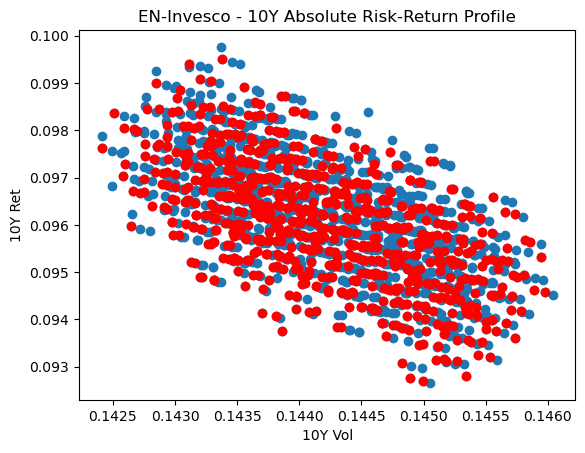

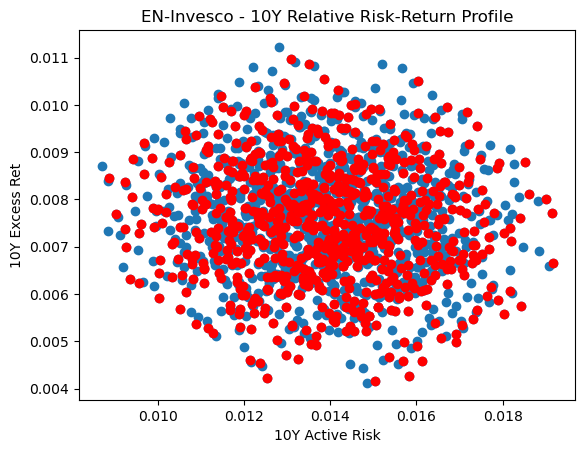

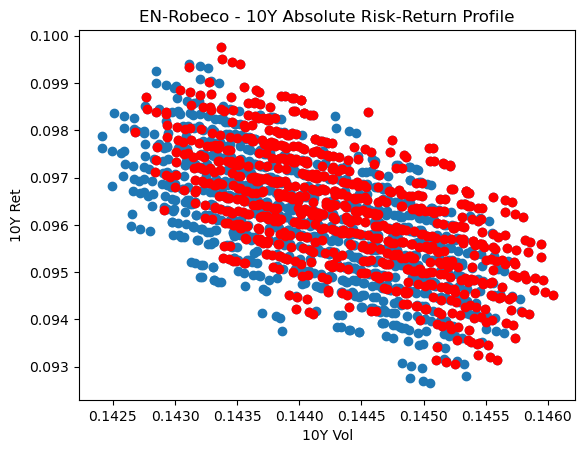

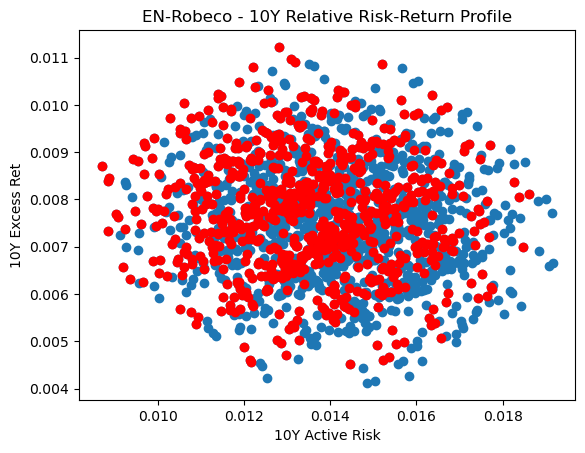

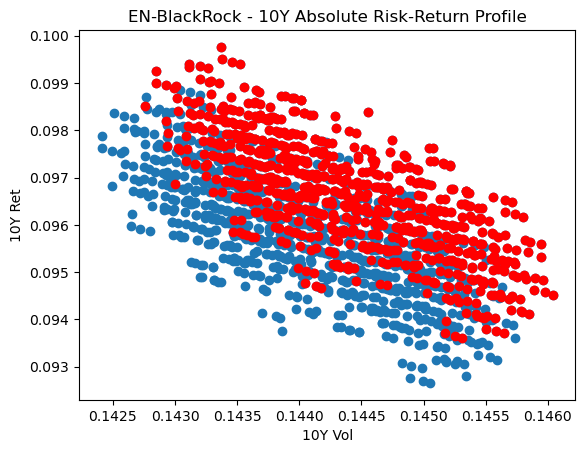

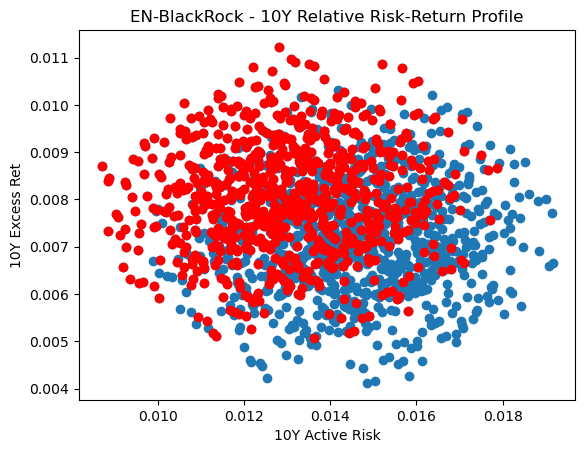

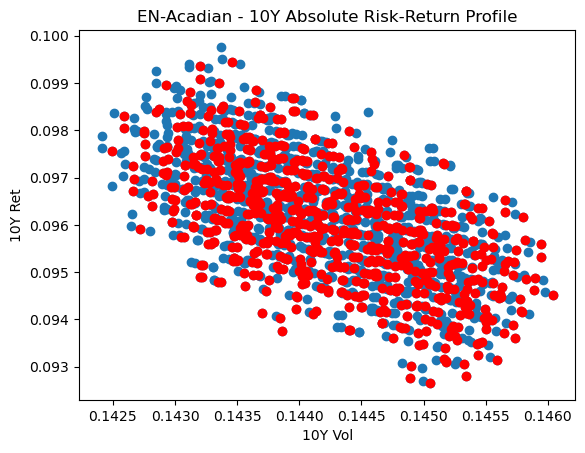

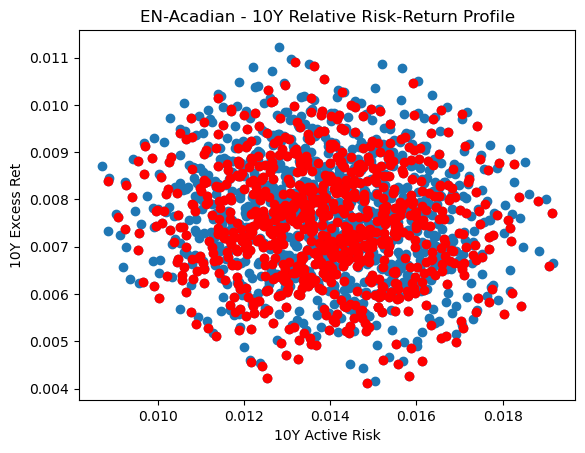

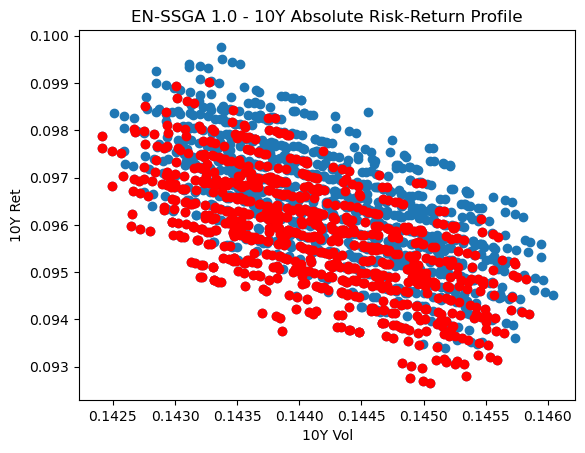

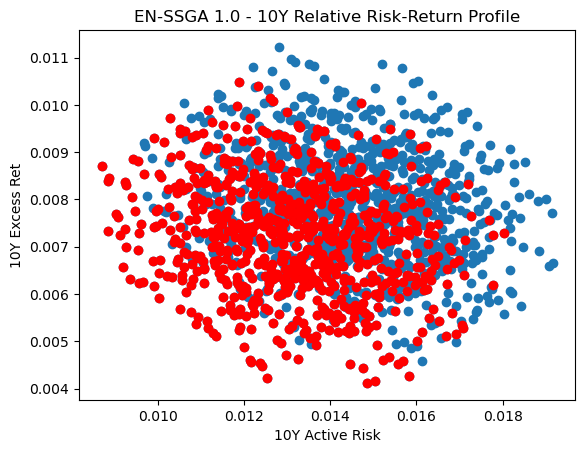

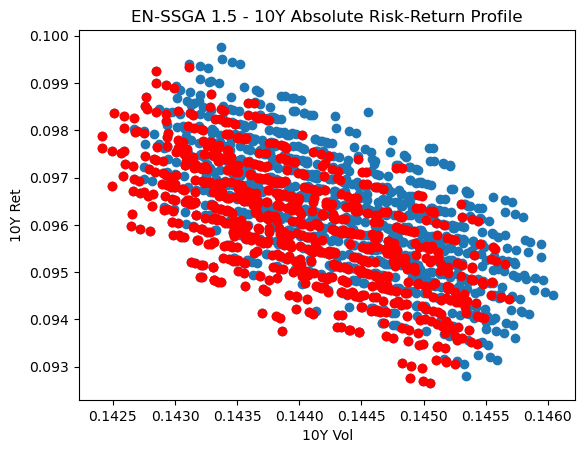

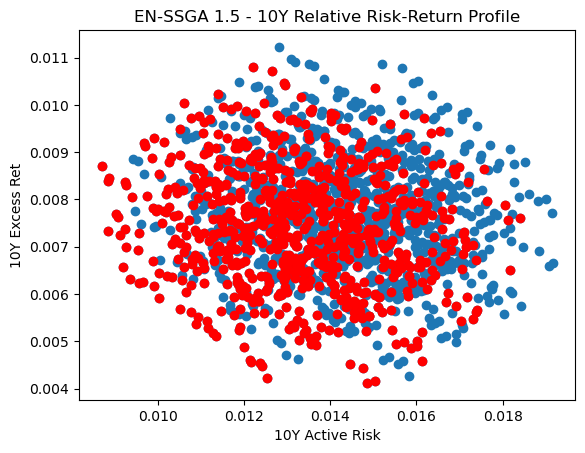

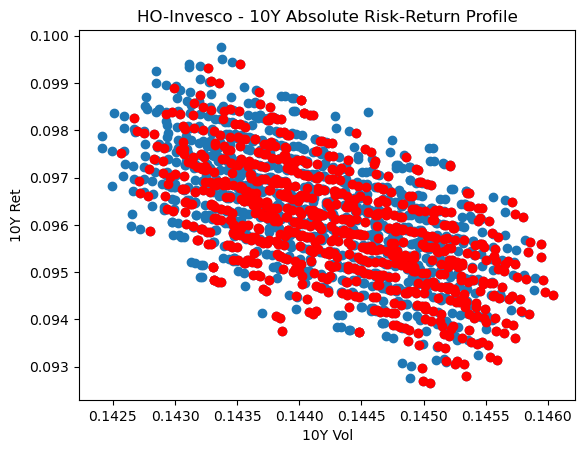

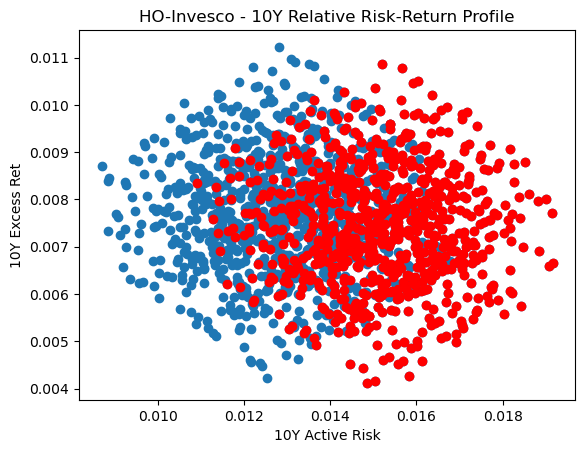

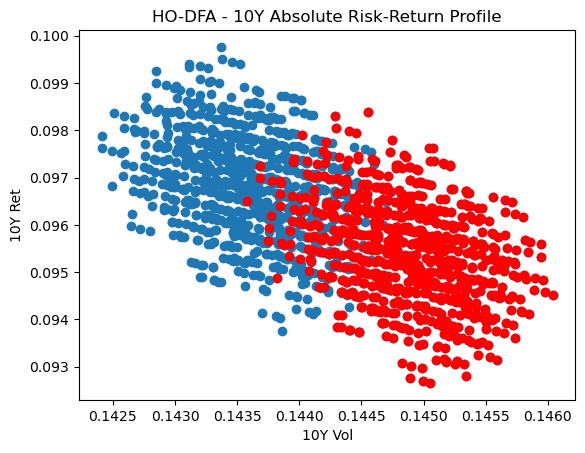

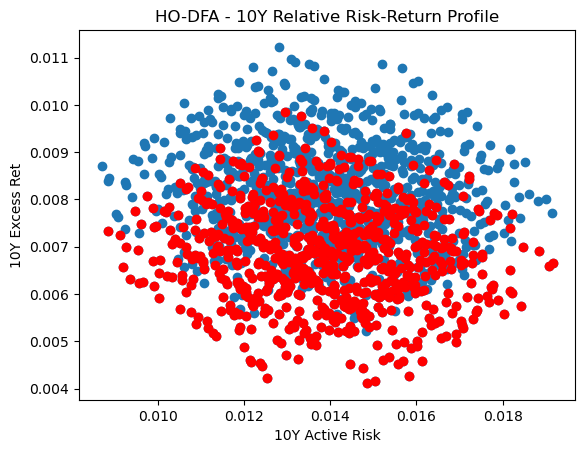

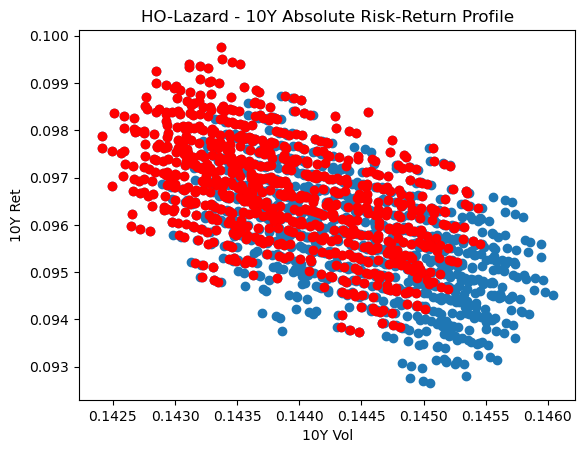

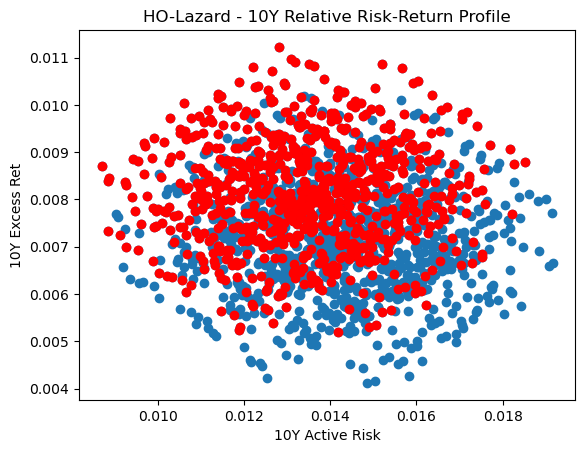

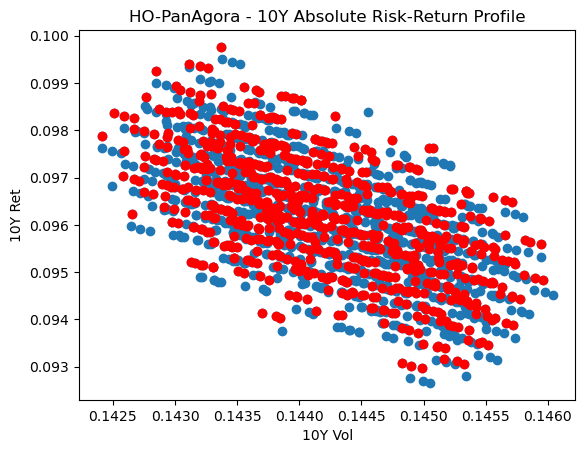

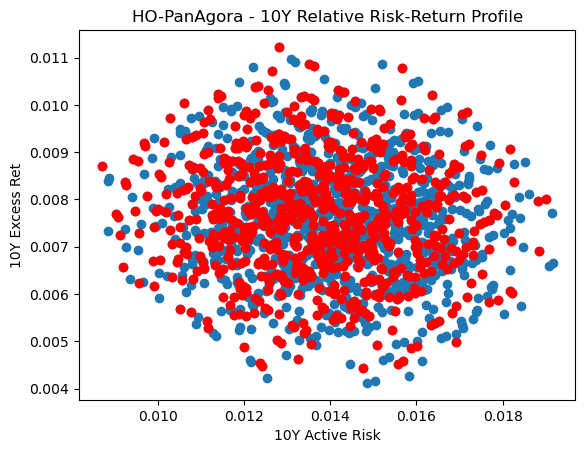

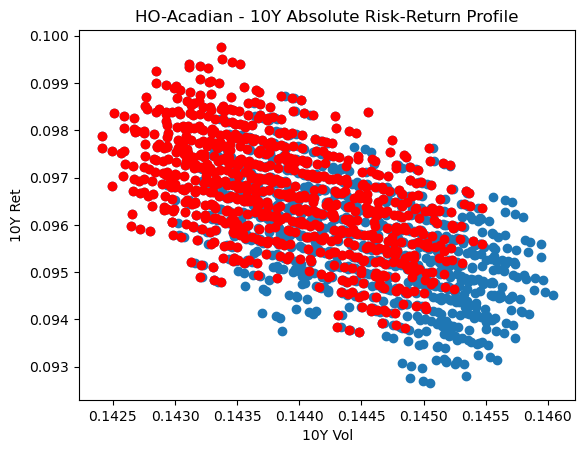

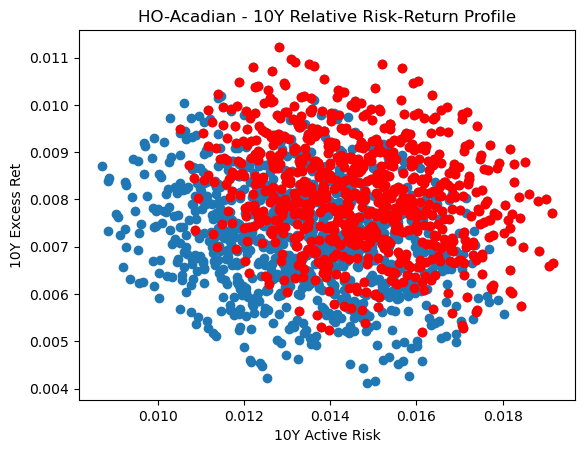

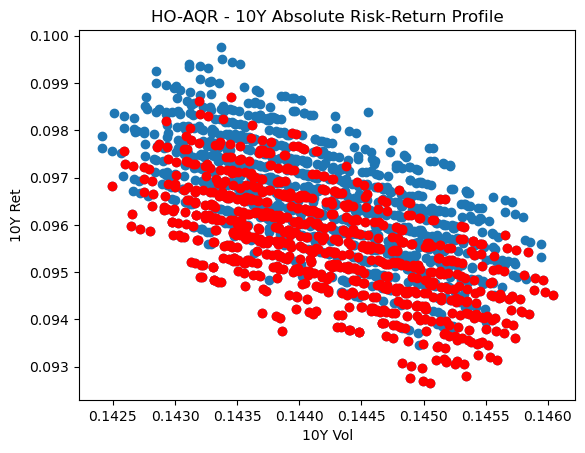

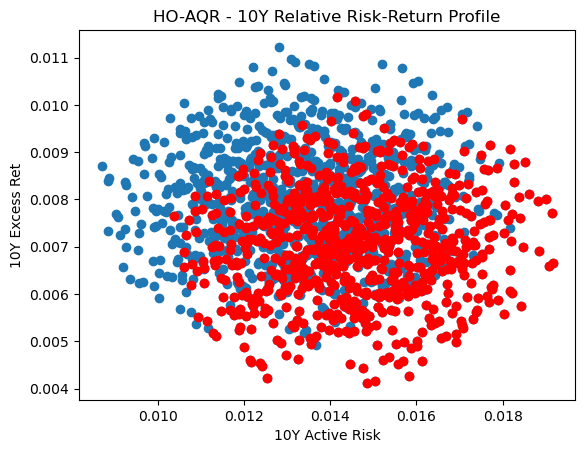

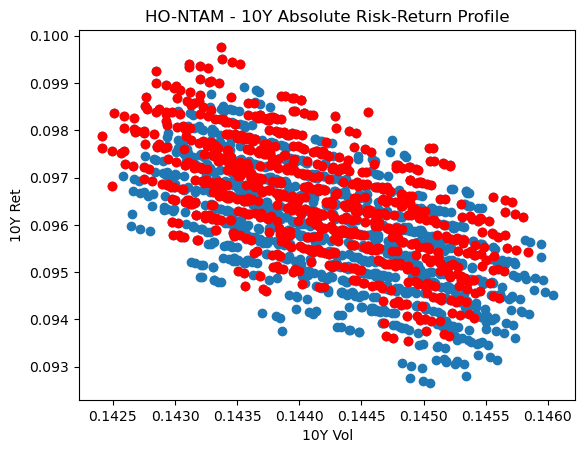

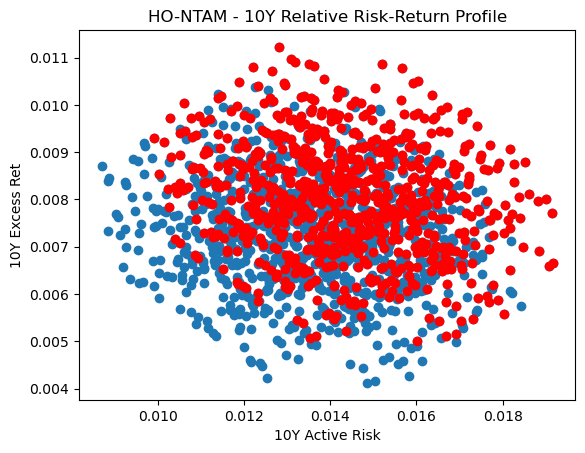

In [32]:
for string in data.columns[:-4]:
    df2 = output.copy()
    df_filtered = df2[df2['Manager 1'].str.contains(string) |
                 df2['Manager 2'].str.contains(string) |
                 df2['Manager 3'].str.contains(string) |
                 df2['Manager 4'].str.contains(string) |
                 df2['Manager 5'].str.contains(string) |
                 df2['Manager 6'].str.contains(string)]
    
    # Create the Sharpe Ratio plot
    plt.scatter(output['10Y Vol'], output['10Y Ann Ret'])
    plt.xlabel('10Y Vol')
    plt.ylabel('10Y Ret')
    plt.title('{} - 10Y Absolute Risk-Return Profile'.format(string))

    # Highlight
    plt.scatter(df_filtered['10Y Vol'], df_filtered['10Y Ann Ret'], color='red', marker='o')
    plt.savefig(f'charts/{string}_absolute.png')
    plt.show()

    # Create the Information Ratio plot
    plt.scatter(output['10Y Excess Vol'], output['10Y Ann Excess Ret'])
    plt.xlabel('10Y Active Risk')
    plt.ylabel('10Y Excess Ret')
    plt.title('{} - 10Y Relative Risk-Return Profile'.format(string))

    # Highlight
    plt.scatter(df_filtered['10Y Excess Vol'], df_filtered['10Y Ann Excess Ret'], color='red', marker='o')
    plt.savefig(f'charts/{string}_relative.png')
    plt.show()

In [ ]:
# weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# manager_list = ['EN-Robeco',
#                 'EN-BlackRock',
#                 'EN-SSGA 1.0',
#                 'EN-Invesco',
#                 'HO-PanAgora',
#                 'HO-Lazard']


# data['Total Portfolio Return'] = np.dot(data[manager_list], weights)
# data['Excess Return'] = data['Total Portfolio Return'] - data['Market']

# output2 = pd.DataFrame(data = [], columns=['Manager 1', 'Manager 2',  'Manager 3', 'Manager 4', 'Manager 5', 'Manager 6', '10Y Ann Ret', '10Y Ann Excess Ret', '10Y Vol', '10Y Excess Vol', '10Y Sharpe', '10Y IR'])
# output2.loc[0] = [np.nan] * len(output2.columns)

# returns = np.prod(1 + data['Total Portfolio Return']) ** (1/10) - 1
# market_ret = np.prod(1 + data['Market']) ** (1/10) - 1
# risk_free_returns = np.prod(1 + data['Rf']) ** (1/10) - 1
# excess_ret = returns - market_ret
# vol = data['Total Portfolio Return'].std() * np.sqrt(119/120) * np.sqrt(12)
# excess_vol = data['Excess Return'].std() * np.sqrt(119/120) * np.sqrt(12)
# sharpe = (returns - risk_free_returns) / vol
# ir = excess_ret / excess_vol

# output2['Manager 1'] = manager_list[0]
# output2['Manager 2'] = manager_list[1]
# output2['Manager 3'] = manager_list[2]
# output2['Manager 4'] = manager_list[3]
# output2['Manager 5'] = manager_list[4]
# output2['Manager 6'] = manager_list[5]
# output2['10Y Ann Ret'] = returns
# output2['10Y Ann Excess Ret'] = excess_ret
# output2['10Y Vol'] = vol
# output2['10Y Excess Vol'] = excess_vol
# output2['10Y Sharpe'] = sharpe
# output2['10Y IR'] = ir
# output2